<a href="https://colab.research.google.com/github/BogdanT54/Serii-de-Timp/blob/Proiect/Analiza_S%26P500_(Proiect_Serii_Timp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caiet lucru analiza S&P 500 (2015-2025)**

Cerinte:

o   Prezentarea problemei

o   Surse de date (se extrag douƒÉ serii de timp, posibil interdependente)

o   Modele econometrice folosite

    - estimarea unui model univariat de timp pentru fiecare serie de timp

    - estimarea unui model multivariat pentru interdependen»õa dintre ele

o   Concluzii »ôi interpretƒÉri

  √én realizarea proiectului se va avea √Æn vederea ilustrarea urmƒÉtoarelor concepte de analizƒÉ a seriilor de timp:

1.      Modele cu trend determinist sau stochastic

2.      Serii sta»õionare

3.      Modele ARMA-ARIMA-SARIMA

4.      Predic»õia punctualƒÉ »ôi predic»õia pe interval de √Æncredere

5.      Modele de cointegrare »ôi modele VAR.


In [35]:
# InstaleazƒÉ pachetele necesare (rulat o singurƒÉ datƒÉ)
!pip3 install yfinance statsmodels arch seaborn

In [38]:
# Importuri
import yfinance as yf
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
import statsmodels.tsa.stattools as ts
from google.colab import files
from arch.unitroot import ADF, PhillipsPerron, KPSS
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

In [5]:
#Fac un dataframe cu fisierul dat
sp500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)

#Verific Df-ul
sp500.head()

High          Low         Open        Close        Volume  \
Date                                                                           
2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09   
2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09   
2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09   

              Adj Close  
Date                     
2015-11-23  2086.590088  
2015-11-24  2089.139893  
2015-11-25  2088.870117  
2015-11-26  2088.870117  
2015-11-27  2090.110107

In [6]:
#Prelucram randamentele logaritmice si curatam valorile lipsa
sp500_log_returns = np.log(sp500 / sp500.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()

#Afisez
sp500_log_returns.head()

High       Low      Open     Close    Volume  Adj Close
Date                                                                   
2015-11-24 -0.000711 -0.005347 -0.002391  0.001221  0.079516   0.001221
2015-11-25 -0.000535  0.007703  0.002339 -0.000129 -0.308755  -0.000129
2015-11-26  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000
2015-11-27  0.000139 -0.001041 -0.000230  0.000593 -0.665240   0.000593
2015-11-28  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000

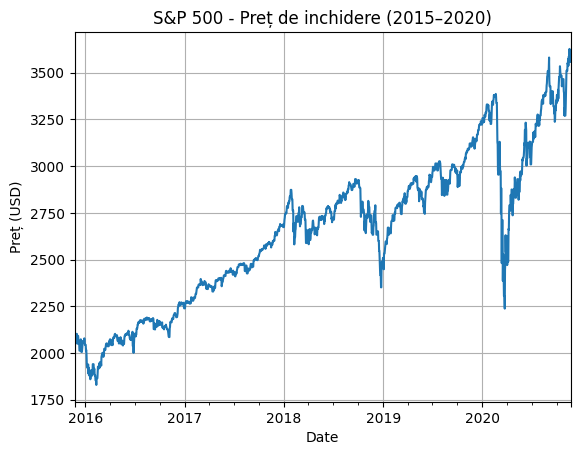

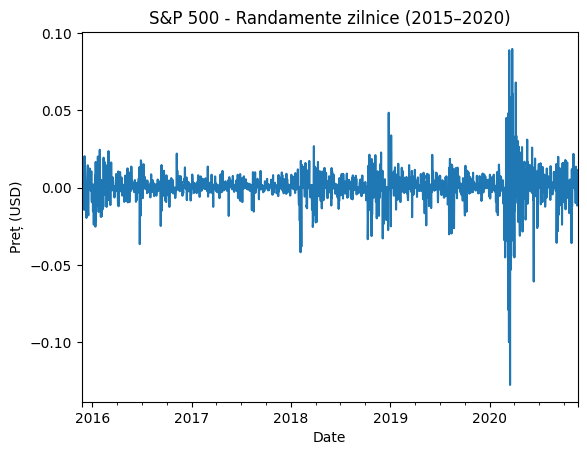

In [24]:
# Plot - Pre»õ ajustat real
sp500['Close'].plot(title='S&P 500 - Pre»õ de inchidere (2015‚Äì2020)')
plt.ylabel("Pre»õ (USD)")
plt.grid(True)
plt.show()

# Plot - Pre»õ ajustat randamente logartimice
sp500_log_returns['Close'].plot(title='S&P 500 - Randamente zilnice (2015‚Äì2020)')
plt.ylabel("Pre»õ (USD)")
plt.show()

# **üìà Evolu»õia S&P 500 (2015‚Äì2020)**

**üîπ Observa»õii tehnice:**

Trend general ascendent √Æntre 2016 »ôi √Ænceputul lui 2020.

Corec»õii semnificative la finalul lui 2018 »ôi √Æn martie 2020.

Volatilitate crescutƒÉ √Æn perioadele de incertitudine economicƒÉ.

**üîπ Evenimente economice relevante:**

2015‚Äì2016: √éngrijorƒÉri legate de economia Chinei »ôi scƒÉderea pre»õului petrolului.

2018: Tensiuni comerciale √Æntre SUA »ôi China; majorarea ratelor dob√¢nzilor de cƒÉtre FED.

2020: Pandemia COVID-19 a provocat o scƒÉdere rapidƒÉ de aproximativ 34% √Æn martie, urmatƒÉ de o revenire sus»õinutƒÉ de stimulente fiscale »ôi monetare.

***‚è©‚è©‚è©Deoarece trendul este stochastic (Seria urcƒÉ sau coboarƒÉ la √Ænt√¢mplare, cu "salturi" de la o perioadƒÉ la alta) am aplicat diferentierea prin logaritmarea randametelor pentru a obtine un trend deterministic.***

# **üìä Randamente zilnice S&P 500**

**üîπ Observa»õii tehnice:**

Randamente relativ stabile √Æn perioadele de cre»ôtere economicƒÉ.

Spike-uri semnificative √Æn perioadele de crizƒÉ, indic√¢nd volatilitate ridicatƒÉ.

Distribu»õie leptokurticƒÉ: frecven»õƒÉ crescutƒÉ a valorilor extreme.

**üîπ Interpretare:**

Randamentele zilnice sunt √Æn general sta»õionare, dar prezintƒÉ heteroscedasticitate √Æn perioadele de stres economic.

Modelarea volatilitƒÉ»õii poate fi eficient realizatƒÉ prin modele ARCH/GARCH.

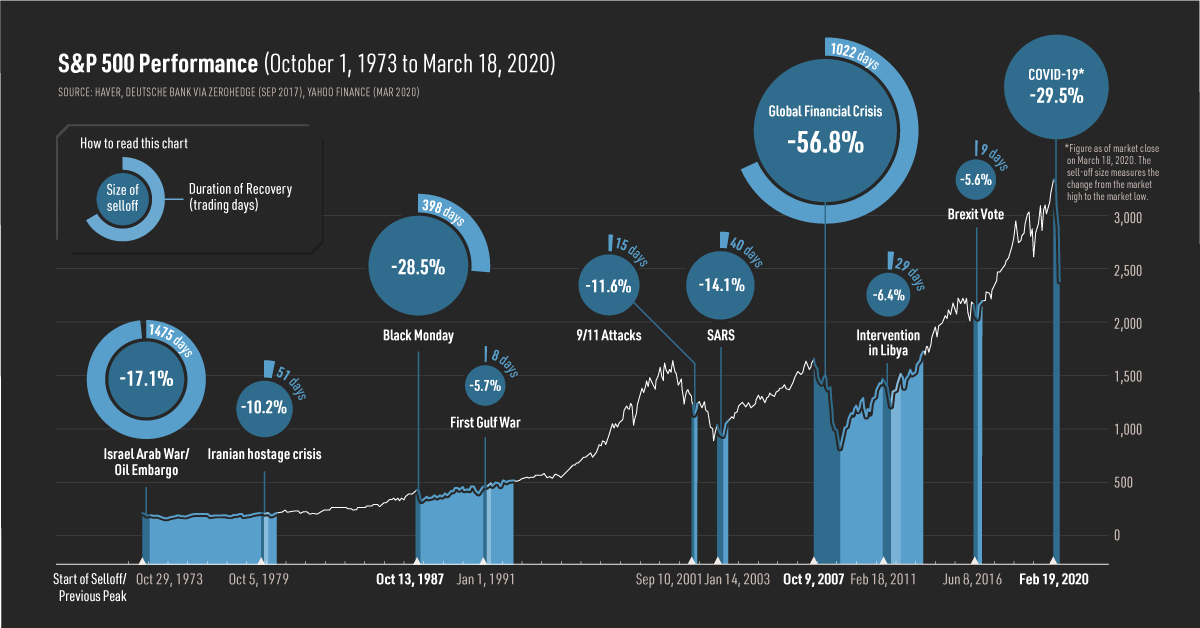

In [10]:
def analiza_trend(series, title=''):
    print(f'=== Analiza trend pentru {title} ===\n')

    # 2. Test ADF
    adf = ADF(series, trend='ct')
    print(adf.summary(),'\n')
    adf_stationary = adf.pvalue < 0.05

    # 3. Test KPSS
    kpss_test = KPSS(series, trend='ct')
    print(kpss_test.summary(),'\n')
    kpss_stationary = kpss_test.pvalue > 0.05

    # 4. Test Phillips-Perron
    pp = PhillipsPerron(series, trend='ct')
    print(pp.summary(),'\n')
    pp_stationary = pp.pvalue < 0.05

    # 5. Concluzie automatƒÉ
    print('--- Concluzie ---')
    if adf_stationary and pp_stationary and kpss_stationary:
        print(f'Seria {title} are un trend determinist.')
    elif not adf_stationary and not pp_stationary and not kpss_stationary:
        print(f'Seria {title} are un trend stochastic.')
    else:
        print(f'Seria {title} necesitƒÉ o analizƒÉ mai detaliatƒÉ (rezultate mixte √Æntre teste).')
    print('=============================\n')

analiza_trend(sp500['Close'], title='S&P 500 - Close')
analiza_trend(sp500_log_returns['Close'], title='S&P 500 - Close')

=== Analiza trend pentru S&P 500 - Close ===

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.173
P-value                         0.005
Lags                               23
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

    KPSS Stationarity Test Results   
Test Statistic                  0.209
P-value                         0.012
Lags                               27
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root. 

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.149
P-value                         0.005
Lags                               25
-------------------

<Figure size 1000x500 with 0 Axes>

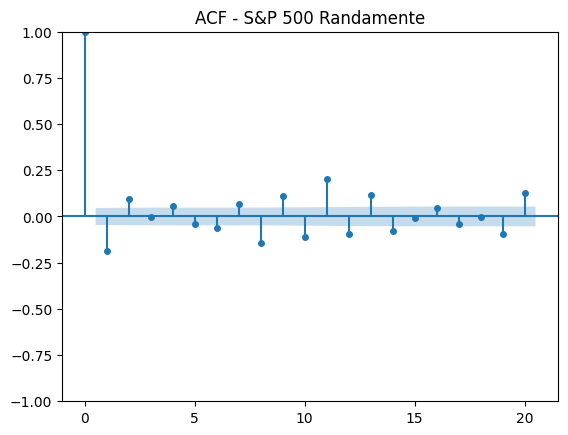

<Figure size 1000x500 with 0 Axes>

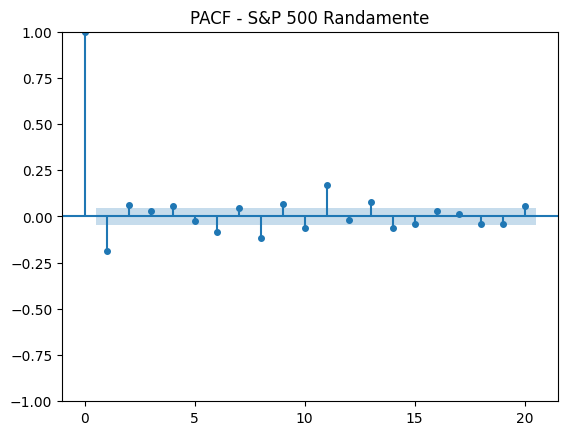

In [12]:
# ACF (pentru q ‚Äì partea MA)
plt.figure(figsize=(10, 5))
plot_acf(sp500_log_returns['Close'], lags=20, markersize=4)
plt.title('ACF - S&P 500 Randamente')
plt.show()

# PACF (pentru p ‚Äì partea AR)
plt.figure(figsize=(10, 5))
plot_pacf(sp500_log_returns['Close'], lags=20, markersize=4)
plt.title('PACF - S&P 500 Randamente')
plt.show()

# **Rezultate ACF si PACF**

Din PACF si ACF ne se sugereaza sa folosim un AR(2) din PACF si un MA(2) sau MA(3) din ACF.

Mai jos, vom testa mai multe variante de ARIMA pentru a determina care este cel mai bun pentru analiza noastra.

In [26]:
#Testare multiple modele ARIMA pentru S&P500 pentru a determina care este cel mai bun

def testeaza_modele_arima(serie, p_max=3, d=0, q_max=3):
    rezultate = []

    for p in range(p_max + 1):
        for q in range(q_max + 1):
            try:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")

                    model = ARIMA(serie, order=(p, d, q))
                    fitted = model.fit()
                    resid = fitted.resid.dropna()

                    rezultate.append({
                        'Model': f'ARIMA({p},{d},{q})',
                        'AIC': fitted.aic,
                        'BIC': fitted.bic,
                        'HQIC': fitted.hqic,
                        'LogLik': fitted.llf,
                        'Num_Params': len(fitted.params),
                        'Sigma2': np.var(resid, ddof=1),
                        'Skewness': skew(resid),
                        'Kurtosis': kurtosis(resid),
                    })

            except Exception as e:
                continue

    df_rezultate = pd.DataFrame(rezultate)
    df_rezultate = df_rezultate.sort_values(by='AIC')
    return df_rezultate

#Rulam functia pentru randamentele logaritmate si p,q max=3
df_arima = testeaza_modele_arima(sp500_log_returns['Close'], p_max=3, d=0, q_max=3)
df_arima.head(20)

Model           AIC           BIC          HQIC       LogLik  \
2   ARIMA(0,0,2) -11625.205198 -11603.170050 -11617.076607  5816.602599   
3   ARIMA(0,0,3) -11624.212126 -11596.668191 -11614.051387  5817.106063   
9   ARIMA(2,0,1) -11624.096461 -11596.552525 -11613.935721  5817.048230   
8   ARIMA(2,0,0) -11623.690831 -11601.655682 -11615.562239  5815.845416   
6   ARIMA(1,0,2) -11623.264066 -11595.720130 -11613.103326  5816.632033   
12  ARIMA(3,0,0) -11623.051701 -11595.507765 -11612.890961  5816.525850   
5   ARIMA(1,0,1) -11622.524397 -11600.489249 -11614.395806  5815.262199   
13  ARIMA(3,0,1) -11621.493167 -11588.440444 -11609.300279  5816.746583   
7   ARIMA(1,0,3) -11620.785691 -11587.732968 -11608.592803  5816.392845   
11  ARIMA(2,0,3) -11620.560816 -11581.999306 -11606.335781  5817.280408   
14  ARIMA(3,0,2) -11620.059913 -11581.498402 -11605.834877  5817.029956   
10  ARIMA(2,0,2) -11620.020872 -11586.968149 -11607.827984  5816.010436   
4   ARIMA(1,0,0) -11619.079145 -11602.552784 -11612.982702  5812.539573   
15  ARIMA(3,0,3) -11618.172722 -11574.102424 -11601.915538  5817.086361   
1   ARIMA(0,0,1) -11609.774614 -11593.248252 -11603.678170  5807.887307   
0   ARIMA(0,0,0) -11557.807515 -11546.789940 -11553.743219  5780.903757   

    Num_Params    Sigma2  Skewness   Kurtosis  
2            4  0.000100 -1.896389  34.848769  
3            5  0.000099 -1.874059  34.720678  
9            5  0.000099 -1.805362  34.118160  
8            4  0.000100 -1.858358  34.179849  
6            5  0.000100 -1.896055  34.851994  
12           5  0.000100 -1.880596  34.691236  
5            4  0.000100 -1.840046  33.707207  
13           6  0.000099 -1.870801  34.612112  
7            6  0.000100 -1.909759  34.958310  
11           7  0.000099 -1.878886  34.556284  
14           7  0.000099 -1.930267  35.002189  
10           6  0.000100 -1.927407  35.161812  
4            3  0.000100 -1.856988  33.292067  
15           8  0.000099 -1.883033  34.757189  
1            3  0.000100 -1.816665  32.674754  
0            2  0.000103 -1.296530  32.325574

# **‚úÖ Alegem ARIMA(2,0,1)**

Modelul ARIMA(2,0,1) e ca un echilibru bun √Æntre a √ÆnvƒÉ»õa din trecut »ôi a reac»õiona la surprize. Folose»ôte ultimele douƒÉ mi»ôcƒÉri ale pie»õei »ôi ajusteazƒÉ pe baza erorilor recente.

Dintre toate modelele testate, acesta are cele mai bune scoruri de performan»õƒÉ »ôi nu e prea complicat ‚Äì doar 5 parametri. E destul de precis pentru prognoze scurte »ôi destul de simplu c√¢t sƒÉ nu ne √ÆncurcƒÉm √Æn detalii inutile.

In [27]:
#ARIMA (2,0,1) - Salvez cel mai bun model
best_model_sp500_arima = ARIMA(sp500_log_returns['Close'], order=( 2, 0, 1))
best_fitted_sp500 = best_model_sp500_arima.fit()
print(best_fitted_sp500.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1824
Model:                 ARIMA(2, 0, 1)   Log Likelihood                5817.048
Date:                Fri, 02 May 2025   AIC                         -11624.096
Time:                        16:45:38   BIC                         -11596.553
Sample:                    11-24-2015   HQIC                        -11613.936
                         - 11-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.089      0.276      -0.000       0.001
ar.L1          0.2792      0.130      2.152      0.031       0.025       0.534
ar.L2          0.1438      0.026      5.561      0.0

# **Interpretare**

AIC = -11624.096, BIC = -11596.553 ‚Üí valori foarte bune, confirmƒÉ alegerea modelului pe baza criteriilor informa»õionale.

Ljung-Box (lag 1) p-val = 0.97 ‚Üí reziduurile sunt ‚Äûwhite noise‚Äù; nu rƒÉm√¢ne autocorelare nerezolvatƒÉ ‚Üí modelul este bine specificat pentru medie.

# **‚ö†Ô∏è Probleme structurale √Æn reziduuri**

‚ùó Distribu»õie nenormalƒÉ:
Jarque-Bera p-val = 0.00 ‚Üí respingem ipoteza normalitƒÉ»õii.

Skew = -1.81, Kurtosis = 37.12 ‚Üí reziduurile sunt asimetrice »ôi leptokurtice (prezen»õƒÉ de valori extreme), ceea ce contrazice ipoteza normalitƒÉ»õii »ôi confirmƒÉ natura financiarƒÉ a seriei.

‚ùó Heteroscedasticitate prezentƒÉ:

Valori mari ale kurtosis »ôi statisticƒÉ indicatoare JB, combinate cu sigma¬≤ micƒÉ dar instabilƒÉ, sugereazƒÉ volatilitate condi»õionatƒÉ ‚Üí nu putem presupune varian»õƒÉ constantƒÉ.


# **üìà Implica»õie: necesar un model GARCH**

Modelul ARIMA(2,0,1) explicƒÉ foarte bine componenta de medie condi»õionatƒÉ, √ÆnsƒÉ:

Nu captureazƒÉ dinamica volatilitƒÉ»õii, care este esen»õialƒÉ √Æn modelarea riscului financiar.

Este justificatƒÉ aplicarea unui model GARCH (ex: GARCH(1,1)) asupra reziduurilor pentru a modela heteroscedasticitatea condi»õionatƒÉ, fenomen tipic √Æn serii de log-randamente.

# **‚úÖ Concluzie statisticƒÉ**

Modelul ARIMA(2,0,1) este:

corect specificat pentru componenta de medie;

semnificativ statistic √Æn to»õi coeficien»õii dinamici;

√ÆnsƒÉ incomplet fƒÉrƒÉ o extensie GARCH pentru a aborda varian»õa condi»õionatƒÉ.



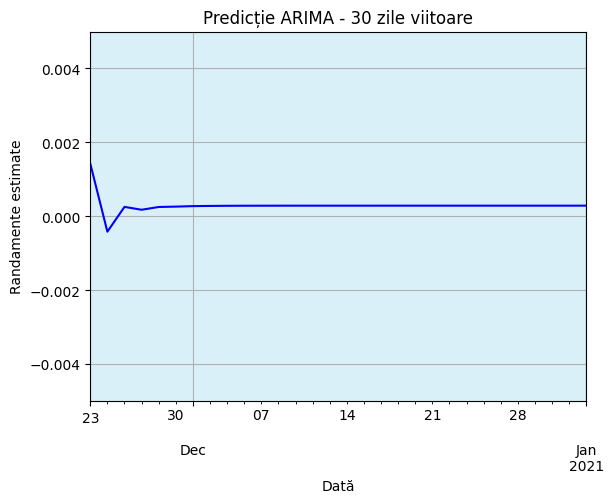

In [19]:
forecast = best_fitted_sp500.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

# SetƒÉm index cu date reale
last_date = sp500_log_returns['Close'].index[-1]
forecast_df.index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# Plot mai clar
forecast_df['mean'].plot(title='Predic»õie ARIMA - 30 zile viitoare', color='blue')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='skyblue', alpha=0.3)
plt.ylabel('Randamente estimate')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.ylim(-0.005, 0.005)  # zoom pe varia»õie micƒÉ (~¬±0.5%)
plt.show()

=== SARIMA pe Randamente Trimestriale ===
                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                   21
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood                 116.921
Date:                           Fri, 02 May 2025   AIC                           -223.843
Time:                                   16:32:47   BIC                           -218.620
Sample:                               12-31-2015   HQIC                          -222.710
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4018      0.519     -0.774      0.439      -1.419       0.616
m

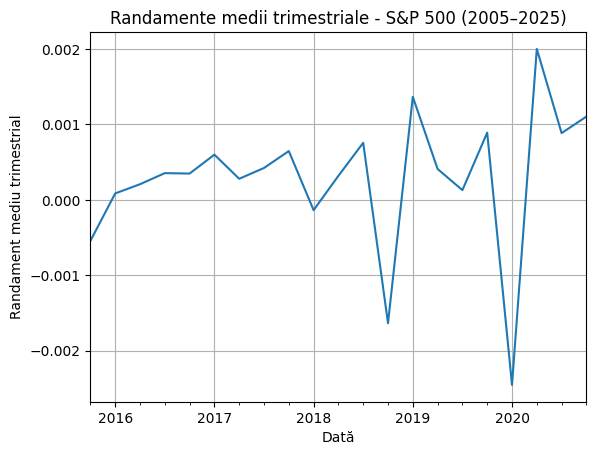

In [20]:
# Randamente medii trimestriale
sp500_quarterly_returns = sp500_log_returns['Close'].resample('Q').mean().dropna()

# SARIMA(p,d,q)(P,D,Q,s) ‚Üí alegem p=1, d=0, q=1 »ôi sezonalitate s=4 (trimestrialƒÉ)
model_q = SARIMAX(sp500_quarterly_returns, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4))
results_q = model_q.fit(disp=False)

# Rezumat
print("=== SARIMA pe Randamente Trimestriale ===")
print(results_q.summary())

# Plot evolu»õie √Æn timp
sp500_quarterly_returns.plot(title='Randamente medii trimestriale - S&P 500 (2005‚Äì2025)', linewidth=1.5)
plt.ylabel('Randament mediu trimestrial')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()

In [21]:
#Reziduurile modelului ARIMA(2,0,1)
r_sp500 = best_fitted_sp500.resid
r_sp500.head()

#Reziduurile patrate
rsq_sp500 = r_sp500**2
rsq_sp500.head()

Date
2015-11-24    8.700844e-07
2015-11-25    6.036907e-08
2015-11-26    1.740368e-07
2015-11-27    6.562588e-08
2015-11-28    4.653988e-08
dtype: float64

# **üîç Scopul calculului reziduurilor »ôi al pƒÉtratelor acestora**

-Extragem reziduurile modelului ARIMA(2,0,1) pentru a izola partea neexplicatƒÉ a seriei.

-CalculƒÉm pƒÉtratul reziduurilor pentru a eviden»õia comportamentul varian»õei √Æn timp.

-PƒÉtratele reziduurilor sunt folosite pentru a analiza prezen»õa autocorela»õiei √Æn varian»õƒÉ.

-DacƒÉ existƒÉ autocorelare √Æn reziduurile pƒÉtrate, √ÆnseamnƒÉ cƒÉ avem efecte ARCH ‚Äì adicƒÉ varian»õa depinde de valorile trecute.

-Acest lucru indicƒÉ cƒÉ modelul ARIMA nu a captat corect dinamica volatilitƒÉ»õii.

-JustificƒÉ aplicarea unui model GARCH, care modeleazƒÉ explicit varian»õa condi»õionalƒÉ a erorii.

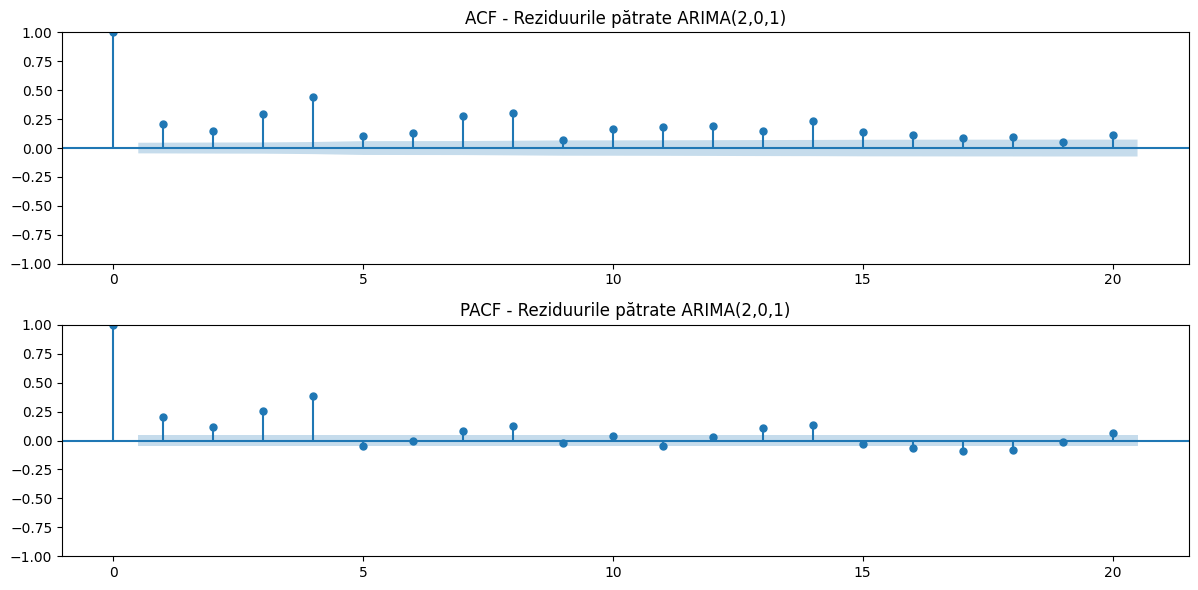

In [22]:
# ACF »ôi PACF pe reziduurile pƒÉtrate
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(rsq_sp500.dropna(), ax=ax[0], lags=20, title='ACF - Reziduurile pƒÉtrate ARIMA(2,0,1)')
plot_pacf(rsq_sp500.dropna(), ax=ax[1], lags=20, title='PACF - Reziduurile pƒÉtrate ARIMA(2,0,1)')
plt.tight_layout()
plt.show()

In [31]:
# ApelƒÉm testul pe reziduurile modelului ARIMA
arch_test = het_arch(r_sp500.dropna(), nlags=10)

# DespachetƒÉm rezultatul
lm_stat, lm_pvalue, f_stat, f_pvalue = arch_test

# Afi»ôƒÉm tot output-ul organizat
print("=== Test ARCH-LM (Engle) pe reziduurile ARIMA(2,0,1) ===")
print(f"LM Statistic     : {lm_stat:.4f}")
print(f"LM p-value       : {lm_pvalue:.4f}")
print(f"F Statistic      : {f_stat:.4f}")
print(f"F p-value        : {f_pvalue:.4f}")
print("========================================================")

=== Test ARCH-LM (Engle) pe reziduurile ARIMA(2,0,1) ===
LM Statistic     : 481.3151
LM p-value       : 0.0000
F Statistic      : 65.1175
F p-value        : 0.0000


| Valoare                    | Explica»õie                                                                                                                                                                                                        |
| -------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **LM Statistic: 481.3151** | Aceasta este statistica testului Lagrange Multiplier (LM), calculatƒÉ pentru a verifica existen»õa **efectelor ARCH** (adicƒÉ autocorelare √Æn pƒÉtratul reziduurilor). O valoare mare indicƒÉ prezen»õa acestor efecte. |
| **LM p-value: 0.0000**     | Probabilitatea de a ob»õine o valoare LM at√¢t de mare dacƒÉ ipoteza nulƒÉ (varian»õƒÉ constantƒÉ) este adevƒÉratƒÉ. Valoarea 0.0000 indicƒÉ o probabilitate aproape zero ‚áí respingem ipoteza nulƒÉ.                         |
| **F Statistic: 65.1175**   | O statisticƒÉ alternativƒÉ, care evalueazƒÉ acela»ôi lucru ca LM, dar pe baza unei regresii auxiliare (F-test pentru semnifica»õia regresiei asupra pƒÉtratelor reziduurilor).                                          |
| **F p-value: 0.0000**      | Valoare-p asociatƒÉ cu F Statistic. Din nou, foarte micƒÉ ‚áí confirmƒÉ rezultatul LM: **varian»õa nu este constantƒÉ √Æn timp**.                                                                                         |

# **‚úÖ Concluzie**

Reziduurile modelului ARIMA(2,0,1) prezintƒÉ heteroscedasticitate de tip ARCH, adicƒÉ varian»õa erorii este condi»õionalƒÉ »ôi variazƒÉ √Æn timp.

‚áí Modelul ARIMA capteazƒÉ bine media, dar nu »ôi volatilitatea.

‚áí Este justificatƒÉ estimarea unui model GARCH(p,q) pe reziduuri sau direct pe serie.

In [39]:
results = []

# TestƒÉm p »ôi q √Æntre 1 »ôi 2 (po»õi extinde)
for p in range(1, 5):
    for q in range(1, 5):
        model = arch_model(r_sp500.dropna(), mean='Zero', vol='GARCH', p=p, q=q)
        fitted = model.fit(disp='off')
        results.append({
            'Model': f'GARCH({p},{q})',
            'AIC': fitted.aic,
            'BIC': fitted.bic,
            'LogLik': fitted.loglikelihood
        })

# Sortare dupƒÉ AIC
df_results = pd.DataFrame(results).sort_values(by='AIC')
print(df_results)

         Model           AIC           BIC       LogLik
1   GARCH(1,2) -12996.017874 -12973.982726  6502.008937
2   GARCH(1,3) -12981.687171 -12954.143235  6495.843585
9   GARCH(3,2) -12978.938349 -12945.885626  6495.469174
8   GARCH(3,1) -12969.272606 -12941.728670  6489.636303
5   GARCH(2,2) -12969.261070 -12941.717134  6489.630535
10  GARCH(3,3) -12968.574805 -12930.013295  6491.287403
4   GARCH(2,1) -12967.468007 -12945.432858  6487.734003
13  GARCH(4,2) -12966.671774 -12928.110264  6490.335887
12  GARCH(4,1) -12965.771112 -12932.718389  6488.885556
0   GARCH(1,1) -12962.418077 -12945.891716  6484.209039
3   GARCH(1,4) -12962.081634 -12929.028911  6487.040817
11  GARCH(3,4) -12956.548296 -12912.477999  6486.274148
14  GARCH(4,3) -12954.141392 -12910.071095  6485.070696
6   GARCH(2,3) -12951.852791 -12918.800068  6481.926396
15  GARCH(4,4) -12940.491681 -12890.912597  6479.245841
7   GARCH(2,4) -12932.972054 -12894.410544  6473.486027


In [40]:
#Luam cel mai bun model
best_model_garch = arch_model(r_sp500.dropna(), mean='Zero', vol='GARCH', p=1, q=2)
best_result = best_model_garch.fit()
print(best_result.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: -6502.008941116742
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6502.008937192111
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                6502.01
Distribution:                  Normal   AIC:                          -12996.0
Method:            Maximum Likelihood   BIC:                          -12974.0
                                        No. Observations:                 1824
Date:                Fri, May 02 2025   Df Residuals:                     1824
Time:                        16:52:22   Df Model:                            0
         

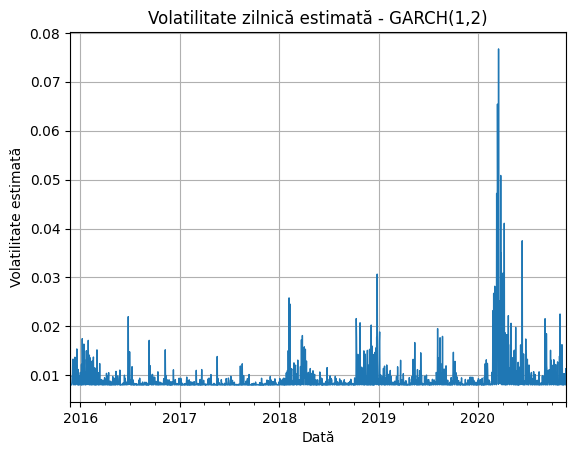

In [61]:
# Plot volatilitate condi»õionalƒÉ (volatilitatea estimatƒÉ √Æn fiecare zi)
best_result.conditional_volatility.plot(title='Volatilitate zilnicƒÉ estimatƒÉ - GARCH(1,2)', linewidth=1)
plt.ylabel('Volatilitate estimatƒÉ')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()

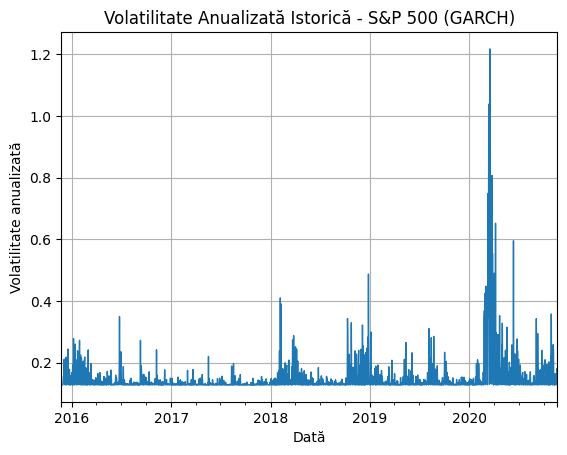

In [62]:
# Volatilitate anualizatƒÉ istoricƒÉ
vol_anualizata_istoric = best_result.conditional_volatility * np.sqrt(252)

# Plot istoric
vol_anualizata_istoric.plot(title='Volatilitate AnualizatƒÉ IstoricƒÉ - S&P 500 (GARCH)', linewidth=1)
plt.ylabel('Volatilitate anualizatƒÉ')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()

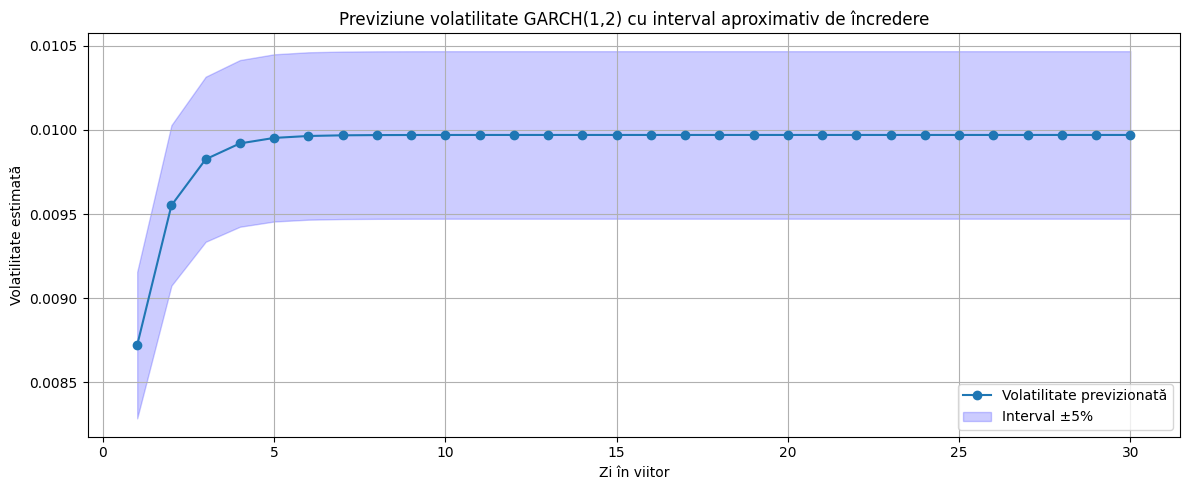

In [64]:
# Previzionare pe 30 zile
forecast = best_result.forecast(horizon=30)
forecast_var = forecast.variance.values[-1]
forecast_vol = np.sqrt(forecast_var)

# Interval de √Æncredere ¬±5% (aproximare)
ci_margin = 0.05 * forecast_vol
lower = forecast_vol - ci_margin
upper = forecast_vol + ci_margin

# Plot
plt.figure(figsize=(12, 5))
plt.plot(range(1, 31), forecast_vol, label='Volatilitate previzionatƒÉ', marker='o')
plt.fill_between(range(1, 31), lower, upper, color='blue', alpha=0.2, label='Interval ¬±5%')
plt.title('Previziune volatilitate GARCH(1,2) cu interval aproximativ de √Æncredere')
plt.xlabel('Zi √Æn viitor')
plt.ylabel('Volatilitate estimatƒÉ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()